### Tests


In [1]:
import scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### CaM/CN 


$\begin{align} 
\frac{d[Ca_2CaM]}{dt} &= k_{b20}[Ca_2CaM]+k_{f02}[Ca]^{2}[CaM]+k_{b42}[Ca_4CaM]-k_{f24}[Ca]^{2}[Ca_2CaM]
\end{align}$

$\begin{align} 
\frac{d[Ca_4CN]}{dt} &= k_{on,CnB}[Ca]^{2}[Ca_2CN]-k_{off,CnB}[Ca_4CN]+k_{off,CnA}[Ca_4CaMCa_4CN]-k_{on,CnA}[Ca_4CaM][Ca_4CN]
\end{align}$

$\begin{align} 
\frac{d[Ca_4CaM]}{dt} &= k_{f24}[Ca]^{2}[Ca_2CaM]-k_{b42}[Ca_4CaM] + k_{off,CnA}[Ca_4CaMCa_4CN] - k_{on,CnA}[Ca_4CaMCa_4CN]
\end{align}$

$\begin{align} 
\frac{d[Ca_4CaMCa_4CN]}{dt} &= k_{on,CnA}[Ca_4CaM][Ca_4CN] - k_{off,CnA}[Ca_4CaMCa_4CN]
\end{align}$


In [2]:
k20  =  10  # [s-1]
Kd02 = 1 # [µM]
k02 = k20/Kd02 # [µM-2*s-1]

k42 = 500 # [s-1]
Kd42 = 10 # [ µM-2]
k24 = k42/Kd42 # [µM-2 s-1]


koffCnA = 1.0 # [s-1]
konCnA = 10000 # [µM-1 s-1]
kdCnA = koffCnA/konCnA #[µM]

koffCnB = 1.0 # [s-1]
konCnB = koffCnB/0.5 # [µM-2 s-1]
kdCnB = koffCnB/konCnB #[ µM-2]

Ca2CaM = Ca4CaM = Ca4CN = Ca4CaM_Ca4CN = 0
const = 1.5; 
CN_t = 2 #[µM]
CaM_t = 3 #[µM]

In [3]:
def dy(y,t, a): 
    [Ca, Ca2CaM, Ca4CaM, Ca4CN, Ca4CaM_Ca4CN]=y
    
    Ca = np.sin(np.pi*0.8*t + 3) # [µM]
    
    CaM = CaM_t - (Ca2CaM + Ca4CaM + Ca4CaM_Ca4CN)
    
    Ca2CN = CN_t - (Ca4CN + Ca4CaM_Ca4CN)

    dCa2CaM_dt = k02*CaM*Ca**2 - k20*Ca2CaM + k42*Ca4CaM - k24*Ca2CaM*Ca**2
                
    dCa4CaM_dt = k24*Ca**2*Ca2CaM - k42*Ca4CaM + koffCnA*Ca4CaM_Ca4CN - konCnA*Ca4CaM*Ca4CN

    dCa4CN_dt = konCnB*Ca**2*Ca2CN - koffCnB*Ca4CN + koffCnA*Ca4CaM_Ca4CN - konCnA*Ca4CaM*Ca4CN

    dCa4CaM_Ca4CN_dt = konCnA*Ca4CaM*Ca4CN - koffCnA*Ca4CaM_Ca4CN
    
    dCaFree_dt = -dCa2CaM_dt + -dCa4CaM_dt + -dCa4CN_dt; 
    dCabound_dt = dCa4CaM_Ca4CN_dt + dCa4CN_dt + dCa4CaM_dt + dCa2CaM_dt
        
    dydt = [dCaFree_dt,
            dCa2CaM_dt,
            dCa4CaM_dt,
            dCa4CN_dt,
            dCa4CaM_Ca4CN_dt]
    
    return dydt


In [4]:
ts = scipy.linspace(0,2, 500)
#initial
a = True
Ca0 = 4 #[µM]

y0 = [Ca0, 0, 0, 0, 0]
y_0 = [0, 0, 0,0]

dy(y0, 1, 0)

ys = scipy.integrate.odeint(dy, y0, ts, args=(a,))
Ca_free = ys[:,0]
y1 = ys[:,1]
y2 = ys[:,2]
y3 = ys[:,3]
y4 = ys[:,4]
Ca_bound = y1 + y2 + y3 + y4

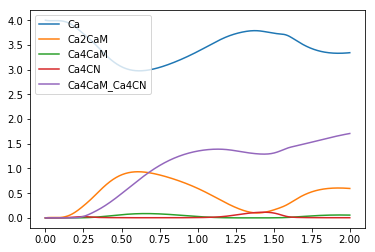

In [5]:
plt.plot(ts,ys[:,0],label="Ca")
plt.plot(ts,ys[:,1],label="Ca2CaM")
plt.plot(ts,ys[:,2],label="Ca4CaM")
plt.plot(ts,ys[:,3],label="Ca4CN")
plt.plot(ts,ys[:,4],label="Ca4CaM_Ca4CN")
plt.legend(loc=2)

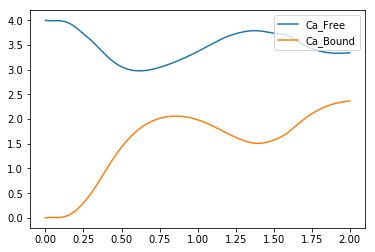

In [6]:
plt.plot(ts, Ca_free ,label="Ca_Free")
plt.plot(ts,Ca_bound,label="Ca_Bound")
plt.legend(loc=1)

## NFAT



$$ \begin{align} NFATpc + Nactive k_f  ⇌ \ k_r NFATNc  \end{align} $$ 
